Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 115ms/step - accuracy: 0.8357 - loss: 0.5376 - val_accuracy: 0.9813 - val_loss: 0.0585
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 113ms/step - accuracy: 0.9728 - loss: 0.0881 - val_accuracy: 0.9891 - val_loss: 0.0362
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 117ms/step - accuracy: 0.9814 - loss: 0.0595 - val_accuracy: 0.9871 - val_loss: 0.0369
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - accuracy: 0.9852 - loss: 0.0481 - val_accuracy: 0.9913 - val_loss: 0.0259
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 113ms/step - accuracy: 0.9870 - loss: 0.0407 - val_accuracy: 0.9915 - val_loss: 0.0250
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - accuracy: 0.9900 - loss: 0.0327 - val_accuracy: 0.9917 - val_loss: 0.0248
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 112ms/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.9922 - val_loss: 0.0255
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.9910 - loss: 0

Test accuracy: 99.27%


Saving 2.jpeg to 2.jpeg
Predicting digit for: 2.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


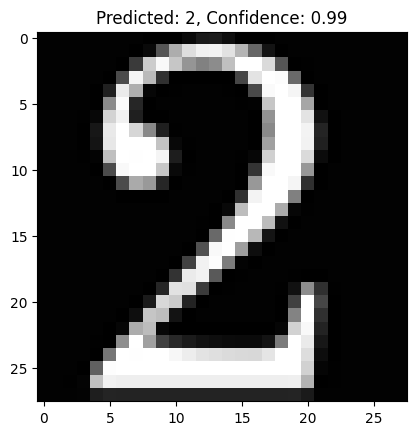

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image, ImageOps

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Save the model
model.save("mnist_digit_classifier.h5")

# Function to load and preprocess the uploaded image
def predict_digit(image_path):
    # Load image, convert to grayscale and resize to 28x28
    img = Image.open(image_path).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((28, 28))

    # Convert image to numpy array and normalize
    img = np.array(img).reshape(1, 28, 28, 1).astype('float32') / 255

    # Predict the digit
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction)

    # Display the result
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_digit}, Confidence: {confidence:.2f}")
    plt.show()
    return predicted_digit

# Upload image for testing
uploaded = files.upload()

# Predict the uploaded image
for image_name in uploaded.keys():
    print(f"Predicting digit for: {image_name}")
    predict_digit(image_name)
